<a href="https://colab.research.google.com/github/katiachan/python-language/blob/new/Image_classifier_Python_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import the libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


###Load the data


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


###Get the shape of the variables arrays

In [ ]:
print('x_train shape:', x_train.shape) 
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

#We see that the shape of the x_train variable is a 4 dimensional array
#we have 50000 rows of data containing 32 by 32 images with depth 3 (for Red Green and Blue)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


###Take a look at the first image as an array and picture

In [ ]:
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

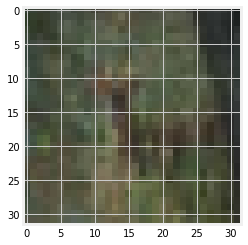

In [ ]:
#Show the image as a picture
img = plt.imshow(x_train[index])

###Get image label and classification

In [ ]:
#Get image label
print('The image label is:', y_train[index])

The image label is: [4]


In [ ]:
#Get image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('The image class is:', classification[y_train[index] [0]])

The image class is: deer


###Convert labels to put in neural network

In [ ]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Print new label of the current image/picture above
print(y_train_one_hot[index])

#the result corresponds to the label 4 

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

## Create the models architecture

In [ ]:
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#Add a pooling layer (2 by 2 pixel filter)
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu') )

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))


In [ ]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)


Epoch 1/10
157/157 [==============================] - 55s 353ms/step - loss: 1.9564 - accuracy: 0.2556 - val_loss: 1.5964 - val_accuracy: 0.4080
Epoch 2/10
157/157 [==============================] - 55s 351ms/step - loss: 1.5689 - accuracy: 0.4209 - val_loss: 1.4678 - val_accuracy: 0.4769
Epoch 3/10
157/157 [==============================] - 55s 352ms/step - loss: 1.4094 - accuracy: 0.4906 - val_loss: 1.2640 - val_accuracy: 0.5473
Epoch 4/10
157/157 [==============================] - 55s 351ms/step - loss: 1.2791 - accuracy: 0.5421 - val_loss: 1.1642 - val_accuracy: 0.5876
Epoch 5/10
157/157 [==============================] - 55s 351ms/step - loss: 1.1880 - accuracy: 0.5816 - val_loss: 1.1706 - val_accuracy: 0.5842
Epoch 6/10
157/157 [==============================] - 55s 351ms/step - loss: 1.0899 - accuracy: 0.6181 - val_loss: 1.0696 - val_accuracy: 0.6262
Epoch 7/10
157/157 [==============================] - 55s 351ms/step - loss: 1.0168 - accuracy: 0.6450 - val_loss: 0.9987 - val_ac

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9390 - accuracy: 0.6720


0.671999990940094

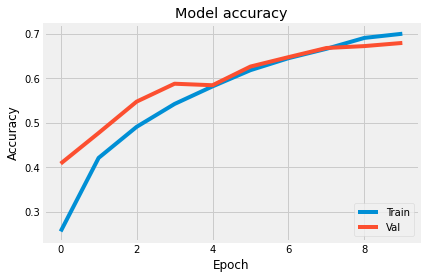

In [ ]:
#Visualize the model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

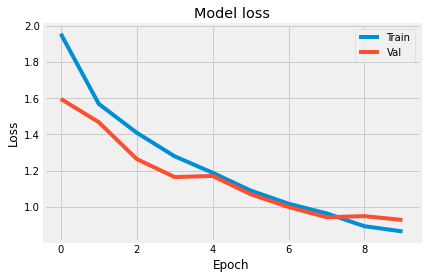

In [ ]:
#Visualize the model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

###Test the model with an example

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving received_679530795722211.jpg to received_679530795722211.jpg


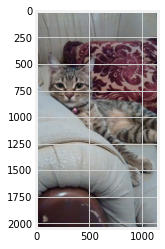

In [ ]:
#Show the image
new_image = plt.imread('received_679530795722211.jpg')
img = plt.imshow(new_image)

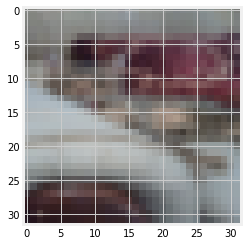

In [ ]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

In [ ]:
#Get the model's predictions
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

array([[0.0341157 , 0.01004752, 0.0668591 , 0.3434555 , 0.18736066,
        0.21828446, 0.02640014, 0.0829018 , 0.02025002, 0.01032512]],
      dtype=float32)

In [ ]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show sorted labels in order
print(list_index)


[3, 5, 4, 7, 2, 0, 6, 8, 9, 1]
3


In [ ]:
#Print the first 10 predictions
for i in range(10):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 34.35 %
dog : 21.83 %
deer : 18.74 %
horse : 8.29 %
bird : 6.69 %
airplane : 3.41 %
frog : 2.64 %
ship : 2.03 %
truck : 1.03 %
automobile : 1.0 %
